In [1]:
import scipy.stats
import numpy as np
import pandas as pd
from scipy.stats import norm
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import statsmodels.formula.api as smf

In [2]:
# Read in csv file and print out the number of rows
df = pd.read_csv('GPTarget2024.csv')

df_attrition = pd.read_csv('attrition_data.csv') #412 rows

In [3]:
# add synthetic data
number_of_rows = 412  # Adjust the number of rows added
dv_response_mean_value = 100  # Adjust the dv_response_mean value 
microtargeting_value = 1  # Adjust the microtargeting value 
no_microtargeting_value = 0  # Set the no microtargeting value to 0
false_microtargeting_value = 0  # Set the false microtargeting value to 0
issue_stances = [
    "The U.S. should not implement legislation that strengthens digital privacy rights",
    "The U.S. should increase investments in renewable energy technologies.",
    "The U.S. should impose stronger economic sanctions on China.",
    "The U.S. should not increase its support for NATO."
]

# Create a DataFrame with the specified number of rows and the constant values
synthetic_data = pd.DataFrame({
    'dv_response_mean': [dv_response_mean_value] * number_of_rows,
    'microtargeting': [microtargeting_value] * number_of_rows,
    'no microtargeting': [no_microtargeting_value] * number_of_rows,
    'false microtargeting': [false_microtargeting_value] * number_of_rows,
    'issue_stance': np.repeat(issue_stances, number_of_rows // len(issue_stances))
})

# If the number of rows is not divisible by the number of issue stances, add the remainder
remainder = number_of_rows % len(issue_stances)
if remainder:
    synthetic_data = synthetic_data.append(pd.DataFrame({
        'dv_response_mean': [dv_response_mean_value] * remainder,
        'microtargeting': [microtargeting_value] * remainder,
        'no microtargeting': [no_microtargeting_value] * remainder,
        'false microtargeting': [false_microtargeting_value] * remainder,
        'issue_stance': issue_stances[:remainder]
    }), ignore_index=True)

# Append the synthetic data to the original dataframe
df = pd.concat([df, synthetic_data], ignore_index=True)

In [4]:
# Create new dataframes split by issue
df_digital_privacy = df[df['issue_stance'] == "The U.S. should not implement legislation that strengthens digital privacy rights"]
df_renewable_energy = df[df['issue_stance'] == "The U.S. should increase investments in renewable energy technologies."]
df_china_sanctions = df[df['issue_stance'] == "The U.S. should impose stronger economic sanctions on China."]
df_nato_support = df[df['issue_stance'] == "The U.S. should not increase its support for NATO."]

In [5]:
# Hypothesis 1, Model 1. Controlling for political party, political ideology, and political engagement
# All vs control: 
def fit_ols_model(dataframe, formula):
    model = smf.ols(formula=formula, data=dataframe)
    result = model.fit(cov_type='HC3')
    return result

formula = 'dv_response_mean ~ Q("microtargeting") + Q("false microtargeting") + Q("no microtargeting")'

# Fit the models for each issue
result_climate = fit_ols_model(df_renewable_energy, formula)
result_privacy = fit_ols_model(df_digital_privacy, formula)
result_china = fit_ols_model(df_china_sanctions, formula)
result_nato = fit_ols_model(df_nato_support, formula)

# For each issue, print each coefficient and its p-value in a single sentence
print("Vs. Control")
print("For renewable energy, the coefficient for microtargeting is {:.3f} and the p-value is {:.3f}".format(result_climate.params[1], result_climate.pvalues[1]))
print("For digital privacy, the coefficient for microtargeting is {:.3f} and the p-value is {:.3f}".format(result_privacy.params[1], result_privacy.pvalues[1]))
print("For China sanctions, the coefficient for microtargeting is {:.3f} and the p-value is {:.3f}".format(result_china.params[1], result_china.pvalues[1]))
print("For NATO support, the coefficient for microtargeting is {:.3f} and the p-value is {:.3f}".format(result_nato.params[1], result_nato.pvalues[1]))

print("For renewable energy, the coefficient for no microtargeting is {:.3f} and the p-value is {:.3f}".format(result_climate.params['Q("no microtargeting")'], result_climate.pvalues['Q("no microtargeting")']))
print("For digital privacy, the coefficient for no microtargeting is {:.3f} and the p-value is {:.3f}".format(result_privacy.params['Q("no microtargeting")'], result_privacy.pvalues['Q("no microtargeting")']))
print("For China sanctions, the coefficient for no microtargeting is {:.3f} and the p-value is {:.3f}".format(result_china.params['Q("no microtargeting")'], result_china.pvalues['Q("no microtargeting")']))
print("For NATO support, the coefficient for no microtargeting is {:.3f} and the p-value is {:.3f}".format(result_nato.params['Q("no microtargeting")'], result_nato.pvalues['Q("no microtargeting")']))

print("For renewable energy, the coefficient for false microtargeting is {:.3f} and the p-value is {:.3f}".format(result_climate.params['Q("false microtargeting")'], result_climate.pvalues['Q("false microtargeting")']))
print("For digital privacy, the coefficient for false microtargeting is {:.3f} and the p-value is {:.3f}".format(result_privacy.params['Q("false microtargeting")'], result_privacy.pvalues['Q("false microtargeting")']))
print("For China sanctions, the coefficient for false microtargeting is {:.3f} and the p-value is {:.3f}".format(result_china.params['Q("false microtargeting")'], result_china.pvalues['Q("false microtargeting")']))
print("For NATO support, the coefficient for false microtargeting is {:.3f} and the p-value is {:.3f}".format(result_nato.params['Q("false microtargeting")'], result_nato.pvalues['Q("false microtargeting")']))


Vs. Control
For renewable energy, the coefficient for microtargeting is 1.269 and the p-value is 0.407
For digital privacy, the coefficient for microtargeting is 13.710 and the p-value is 0.000
For China sanctions, the coefficient for microtargeting is 9.988 and the p-value is 0.000
For NATO support, the coefficient for microtargeting is 9.979 and the p-value is 0.000
For renewable energy, the coefficient for no microtargeting is -0.107 and the p-value is 0.954
For digital privacy, the coefficient for no microtargeting is 6.452 and the p-value is 0.000
For China sanctions, the coefficient for no microtargeting is 12.163 and the p-value is 0.000
For NATO support, the coefficient for no microtargeting is 8.211 and the p-value is 0.000
For renewable energy, the coefficient for false microtargeting is -0.217 and the p-value is 0.914
For digital privacy, the coefficient for false microtargeting is 8.369 and the p-value is 0.000
For China sanctions, the coefficient for false microtargeting i

In [6]:
# All vs. no microtargeting:

# for df_renewable_energy
model_climate1 = smf.ols(formula='dv_response_mean ~ Q("microtargeting") + Q("false microtargeting") + Q("control") + political_party_coded + political_ideology_coded + political_engagement_coded', data=df_renewable_energy)
result_climate1 = model_climate1.fit(cov_type='HC3')

# For df_digital_privacy
model_privacy1 = smf.ols(formula='dv_response_mean ~ Q("microtargeting") + Q("false microtargeting") + Q("control") + political_party_coded + political_ideology_coded + political_engagement_coded', data=df_digital_privacy)
result_privacy1 = model_privacy1.fit(cov_type='HC3')

# For df_china_sanctions
model_china1 = smf.ols(formula='dv_response_mean ~ Q("microtargeting") + Q("false microtargeting") + Q("control") + political_party_coded + political_ideology_coded + political_engagement_coded', data=df_china_sanctions)
result_china1 = model_china1.fit(cov_type='HC3')

# For df_nato_support
model_nato1 = smf.ols(formula='dv_response_mean ~ Q("microtargeting") + Q("false microtargeting") + Q("control") + political_party_coded + political_ideology_coded + political_engagement_coded', data=df_nato_support)
result_nato1 = model_nato1.fit(cov_type='HC3')

print("Vs. no microtargeting")
print("For renewable energy, the coefficient for microtargeting is {:.3f} and the p-value is {:.3f}".format(result_climate1.params[1], result_climate1.pvalues[1]))
print("For digital privacy, the coefficient for microtargeting is {:.3f} and the p-value is {:.3f}".format(result_privacy1.params[1], result_privacy1.pvalues[1]))
print("For China sanctions, the coefficient for microtargeting is {:.3f} and the p-value is {:.3f}".format(result_china1.params[1], result_china1.pvalues[1]))
print("For NATO support, the coefficient for microtargeting is {:.3f} and the p-value is {:.3f}".format(result_nato1.params[1], result_nato1.pvalues[1]))

print("For renewable energy, the coefficient for false microtargeting is {:.3f} and the p-value is {:.3f}".format(result_climate1.params['Q("false microtargeting")'], result_climate1.pvalues['Q("false microtargeting")']))
print("For digital privacy, the coefficient for false microtargeting is {:.3f} and the p-value is {:.3f}".format(result_privacy1.params['Q("false microtargeting")'], result_privacy1.pvalues['Q("false microtargeting")']))
print("For China sanctions, the coefficient for false microtargeting is {:.3f} and the p-value is {:.3f}".format(result_china1.params['Q("false microtargeting")'], result_china1.pvalues['Q("false microtargeting")']))
print("For NATO support, the coefficient for false microtargeting is {:.3f} and the p-value is {:.3f}".format(result_nato1.params['Q("false microtargeting")'], result_nato1.pvalues['Q("false microtargeting")']))

Vs. no microtargeting
For renewable energy, the coefficient for microtargeting is -0.658 and the p-value is 0.547
For digital privacy, the coefficient for microtargeting is 1.658 and the p-value is 0.171
For China sanctions, the coefficient for microtargeting is -4.645 and the p-value is 0.000
For NATO support, the coefficient for microtargeting is -2.750 and the p-value is 0.042
For renewable energy, the coefficient for false microtargeting is -0.934 and the p-value is 0.526
For digital privacy, the coefficient for false microtargeting is 1.662 and the p-value is 0.317
For China sanctions, the coefficient for false microtargeting is -7.724 and the p-value is 0.000
For NATO support, the coefficient for false microtargeting is -7.405 and the p-value is 0.000


In [7]:
# All vs. false microtargeting:

# for df_renewable_energy
model_climate2 = smf.ols(formula='dv_response_mean ~ Q("microtargeting") + Q("control") + Q("no microtargeting") + political_party_coded + political_ideology_coded + political_engagement_coded', data=df_renewable_energy)
result_climate2 = model_climate2.fit(cov_type='HC3')

# For df_digital_privacy
model_privacy2 = smf.ols(formula='dv_response_mean ~ Q("microtargeting") + Q("control") + Q("no microtargeting") + political_party_coded + political_ideology_coded + political_engagement_coded', data=df_digital_privacy)
result_privacy2 = model_privacy2.fit(cov_type='HC3')

# For df_china_sanctions
model_china2 = smf.ols(formula='dv_response_mean ~ Q("microtargeting") + Q("control") + Q("no microtargeting") + political_party_coded + political_ideology_coded + political_engagement_coded', data=df_china_sanctions)
result_china2 = model_china2.fit(cov_type='HC3')

# For df_nato_support
model_nato2 = smf.ols(formula='dv_response_mean ~ Q("microtargeting") + Q("control") + Q("no microtargeting") + political_party_coded + political_ideology_coded + political_engagement_coded', data=df_nato_support)
result_nato2 = model_nato2.fit(cov_type='HC3')

print("Vs. false microtargeting")
print("For renewable energy, the coefficient for microtargeting is {:.3f} and the p-value is {:.3f}".format(result_climate2.params[1], result_climate2.pvalues[1]))
print("For digital privacy, the coefficient for microtargeting is {:.3f} and the p-value is {:.3f}".format(result_privacy2.params[1], result_privacy2.pvalues[1]))
print("For China sanctions, the coefficient for microtargeting is {:.3f} and the p-value is {:.3f}".format(result_china2.params[1], result_china2.pvalues[1]))
print("For NATO support, the coefficient for microtargeting is {:.3f} and the p-value is {:.3f}".format(result_nato2.params[1], result_nato2.pvalues[1]))

print("For renewable energy, the coefficient for no microtargeting is {:.3f} and the p-value is {:.3f}".format(result_climate2.params['Q("no microtargeting")'], result_climate2.pvalues['Q("no microtargeting")']))
print("For digital privacy, the coefficient for no microtargeting is {:.3f} and the p-value is {:.3f}".format(result_privacy2.params['Q("no microtargeting")'], result_privacy2.pvalues['Q("no microtargeting")']))
print("For China sanctions, the coefficient for no microtargeting is {:.3f} and the p-value is {:.3f}".format(result_china2.params['Q("no microtargeting")'], result_china2.pvalues['Q("no microtargeting")']))
print("For NATO support, the coefficient for no microtargeting is {:.3f} and the p-value is {:.3f}".format(result_nato2.params['Q("no microtargeting")'], result_nato2.pvalues['Q("no microtargeting")']))

Vs. false microtargeting
For renewable energy, the coefficient for microtargeting is 0.277 and the p-value is 0.818
For digital privacy, the coefficient for microtargeting is -0.004 and the p-value is 0.997
For China sanctions, the coefficient for microtargeting is 3.080 and the p-value is 0.082
For NATO support, the coefficient for microtargeting is 4.654 and the p-value is 0.004
For renewable energy, the coefficient for no microtargeting is 0.934 and the p-value is 0.526
For digital privacy, the coefficient for no microtargeting is -1.662 and the p-value is 0.317
For China sanctions, the coefficient for no microtargeting is 7.724 and the p-value is 0.000
For NATO support, the coefficient for no microtargeting is 7.405 and the p-value is 0.000


In [8]:
# # Hypothesis 1, Model 1 (controlling for no covariates)
# # For df_renewable_energy
# model_climate = smf.ols(formula='dv_response_mean ~ Q("microtargeting") + Q("false microtargeting") + Q("no microtargeting")', data=df_renewable_energy)
# result_climate = model_climate.fit()

# # For df_digital_privacy
# model_privacy = smf.ols(formula='dv_response_mean ~ Q("microtargeting") + Q("false microtargeting") + Q("no microtargeting")', data=df_digital_privacy)
# result_privacy = model_privacy.fit()

# # For df_china_sanctions
# model_china = smf.ols(formula='dv_response_mean ~ Q("microtargeting") + Q("false microtargeting") + Q("no microtargeting")', data=df_china_sanctions)
# result_china = model_china.fit()

# # For df_nato_support
# model_nato = smf.ols(formula='dv_response_mean ~ Q("microtargeting") + Q("false microtargeting") + Q("no microtargeting")', data=df_nato_support)
# result_nato = model_nato.fit()

In [9]:
# Create a dataframe to store the results for plotting
issues_models = {
    'Renewable Energy': result_climate,
    'Digital Privacy': result_privacy,
    'China Sanctions': result_china,
    'NATO Support': result_nato
}

# Initialize an empty list to store the data
data = []

# Iterate over the dictionary to extract the data
for issue, model in issues_models.items():
    # Extract the coefficients and the confidence intervals
    coef = model.params
    conf_int = model.conf_int()
    
    # Iterate over the coefficients
    for covariate in ['microtargeting', 'false microtargeting', 'no microtargeting']:
        # Use the Q function label format
        q_covariate = f'Q("{covariate}")'
        # Skip if the covariate is not in the model
        if q_covariate not in coef:
            continue
        # Get the coefficient and confidence interval
        coefficient = coef[q_covariate]
        lower_ci, upper_ci = conf_int.loc[q_covariate]
        
        # Append the data to the list
        data.append({
            'Covariate': covariate,
            'Issue': issue,
            'Coefficient': coefficient,
            '95% CI Lower': lower_ci,
            '95% CI Upper': upper_ci
        })

# Create a DataFrame from the list
results_df = pd.DataFrame(data)


In [10]:
# Compute and append precision-weighted means and confidence intervals to the results DataFrame
models = [result_climate, result_privacy, result_china, result_nato]

def compute_weighted_stats(term, models):
    coefficients = np.array([model.params[term] for model in models])
    standard_errors = np.array([model.bse[term] for model in models])

    weights = 1 / standard_errors**2
    weighted_mean = np.sum(coefficients * weights) / np.sum(weights)
    weighted_variance = 1 / np.sum(weights)
    weighted_std_error = np.sqrt(weighted_variance)

    z_critical = scipy.stats.norm.ppf(0.975)  # 97.5th percentile for two-tailed test
    confidence_interval = (weighted_mean - z_critical * weighted_std_error, 
                           weighted_mean + z_critical * weighted_std_error)

    return weighted_mean, weighted_std_error, confidence_interval

# Compute for "microtargeting" and "false microtargeting" and "no microtargeting"
microtargeting_mean, microtargeting_se, microtargeting_ci = compute_weighted_stats('Q("microtargeting")', models)
false_microtargeting_mean, false_microtargeting_se, false_microtargeting_ci = compute_weighted_stats('Q("false microtargeting")', models)
no_microtargeting_mean, no_microtargeting_se, no_microtargeting_ci = compute_weighted_stats('Q("no microtargeting")', models)

# Create a list of dictionaries for the new rows including the standard error
weighted_stats = [
    {'Covariate': 'microtargeting', 'Issue': 'Precision-weighted Mean', 'Coefficient': microtargeting_mean, 'SE': microtargeting_se, '95% CI Lower': microtargeting_ci[0], '95% CI Upper': microtargeting_ci[1]},
    {'Covariate': 'false microtargeting', 'Issue': 'Precision-weighted Mean', 'Coefficient': false_microtargeting_mean, 'SE': false_microtargeting_se, '95% CI Lower': false_microtargeting_ci[0], '95% CI Upper': false_microtargeting_ci[1]},
    {'Covariate': 'no microtargeting', 'Issue': 'Precision-weighted Mean', 'Coefficient': no_microtargeting_mean, 'SE': no_microtargeting_se, '95% CI Lower': no_microtargeting_ci[0], '95% CI Upper': no_microtargeting_ci[1]}
]

# Convert the list of dictionaries to a DataFrame
weighted_stats_df = pd.DataFrame(weighted_stats)

# Append the new DataFrame to the existing results_df
results_df = results_df.append(weighted_stats_df, ignore_index=True)

# Display the updated DataFrame
# print(results_df)

/var/folders/t7/fh798gkn2n7frwp_k082lvj80000gn/T/ipykernel_41382/2882833811.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(weighted_stats_df, ignore_index=True)


In [11]:
def z_test(mean1, se1, mean2, se2):
    # Calculate the difference in means
    mean_diff = mean1 - mean2
    # Calculate the standard error of the difference
    se_diff = np.sqrt(se1**2 + se2**2)
    # Calculate the z-statistic
    z_stat = mean_diff / se_diff
    # Calculate the p-value
    p_value = 2 * (1 - norm.cdf(abs(z_stat)))
    return z_stat, p_value

# Define a function to perform the z-test and print the results
def compare_means(mean1, se1, mean2, se2, label1, label2):
    z_stat, p_value = z_test(mean1, se1, mean2, se2)
    if p_value < 0.05:
        print(f"Comparison between {label1} and {label2} IS statistically significant (Z-statistic: {z_stat:.3f}, P-value: {p_value:.3f})")
    else:
        print(f"Comparison between {label1} and {label2} is not statistically significant (Z-statistic: {z_stat:.3f}, P-value: {p_value:.3f})")

# Create a list of tuples with the means, standard errors, and labels
comparisons = [
    (microtargeting_mean, microtargeting_se, false_microtargeting_mean, false_microtargeting_se, 'microtargeting', 'false microtargeting'),
    (microtargeting_mean, microtargeting_se, no_microtargeting_mean, no_microtargeting_se, 'microtargeting', 'no microtargeting'),
    (no_microtargeting_mean, no_microtargeting_se, false_microtargeting_mean, false_microtargeting_se, 'no microtargeting', 'false microtargeting')
]

# Iterate over the comparisons and perform the z-test
for mean1, se1, mean2, se2, label1, label2 in comparisons:
    compare_means(mean1, se1, mean2, se2, label1, label2)

Comparison between microtargeting and false microtargeting IS statistically significant (Z-statistic: 3.993, P-value: 0.000)
Comparison between microtargeting and no microtargeting is not statistically significant (Z-statistic: 1.858, P-value: 0.063)
Comparison between no microtargeting and false microtargeting IS statistically significant (Z-statistic: 2.103, P-value: 0.035)


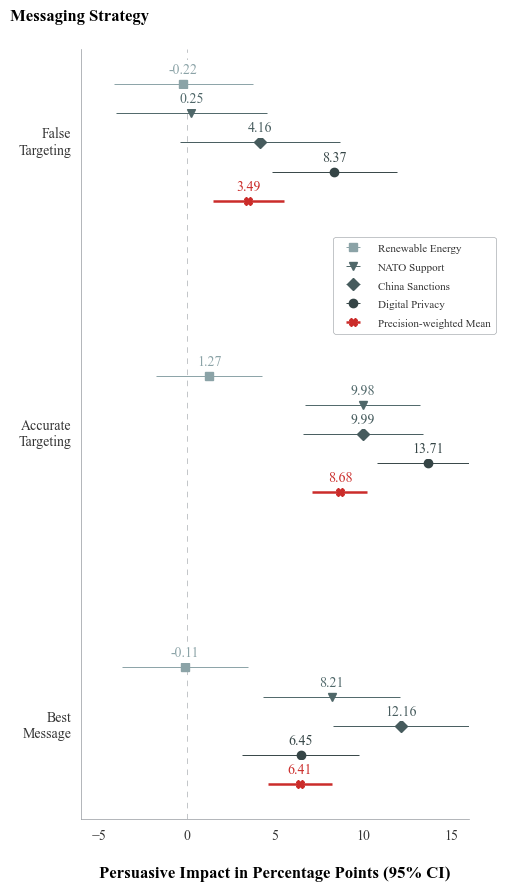

In [12]:
#FIGURE 1 Updated to plot results_df without overlap
# Set the font to "Times New Roman"
plt.rcParams["font.family"] = "Times New Roman"

# Define constants based on results_df
ISSUES = ["Renewable Energy", "NATO Support", "China Sanctions", "Digital Privacy", "Precision-weighted Mean"]
# ISSUES = results_df['Issue'].unique()
NEW_LABELS = ['no microtargeting', 'microtargeting', 'false microtargeting']
COLOR_MAP = ['#8BA3A7', '#4F6769', '#465B5D', '#354546', '#CB2C2A']
MARKERS = ['s', 'v', 'D', 'o', 'X']

# Set the plot dimensions
fig, ax = plt.subplots(figsize=(5,10))

# Initialize y_pos array for the base position of the first issue
base_y_pos = np.arange(len(NEW_LABELS), dtype=float)

# The vertical offset to apply for each subsequent issue
vertical_offset = 0.1  # Adjust as needed for spacing

# Iterate over the unique issues
for idx, (issue, color, marker) in enumerate(zip(ISSUES, COLOR_MAP, MARKERS)):
    # Calculate the y_pos for the current issue with an offset
    y_pos = base_y_pos - idx * vertical_offset
    
    # Filter the results_df for the current issue
    issue_data = results_df[results_df['Issue'] == issue]
    
    # Initialize a variable to control the addition of the label to the legend
    added_label = False
    
    # Set the line width based on the issue
    line_width = 0.7 if issue != "Precision-weighted Mean" else 1.8
    
    # Iterate over the unique covariates
    for i, covariate in enumerate(NEW_LABELS):
        # Filter the issue_data for the current covariate
        covariate_data = issue_data[issue_data['Covariate'] == covariate]
        
        # Plot coefficients with error bars
        ax.errorbar(covariate_data['Coefficient'], y_pos[i], 
                    xerr=[covariate_data['Coefficient'] - covariate_data['95% CI Lower'], 
                          covariate_data['95% CI Upper'] - covariate_data['Coefficient']], 
                    fmt=marker, color=color, ecolor=color, capsize=0, linewidth=line_width,
                    label=issue if not added_label else "")
        
        # Ensure that the label is added only once
        added_label = True
        
        # Add coefficient labels
        ax.text(covariate_data['Coefficient'].values[0], y_pos[i] + 0.05, f"{covariate_data['Coefficient'].values[0]:.2f}", 
                va='center', ha='center', color=color, 
                bbox=dict(facecolor='white', edgecolor='none', pad=2.1))

# Configure the plot
plt.axvline(0, color='#94999E', linestyle='--', linewidth=0.4, dashes=(10, 10))
plt.xlim(-6, 16)

ax.set_xlabel('Persuasive Impact in Percentage Points (95% CI)', fontsize=12, fontweight='bold', labelpad=17)
ax.set_yticks(base_y_pos- 0.19)
ax.set_yticklabels(['Best\nMessage', 'Accurate\nTargeting', 'False\nTargeting'])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_color('#94999E')
ax.spines['bottom'].set_color('#94999E')
ax.spines['left'].set_linewidth(0.5)
ax.spines['bottom'].set_linewidth(0.5)
ax.text(-6.1, len(NEW_LABELS) - .77, 'Messaging Strategy', rotation=0, va='center', ha='center', fontweight='bold', fontsize=12)
ax.tick_params(colors='#333333')
ax.xaxis.set_major_locator(ticker.MaxNLocator(5))
ax.tick_params(left=False)
ax.tick_params(bottom=False)

# Configure the legend
handles, labels = ax.get_legend_handles_labels()
legend = ax.legend(handles, labels, loc=(0.65, 0.63), edgecolor='#94999E')
legend.get_frame().set_linewidth(0.5)

for text in legend.get_texts():
    text.set_color('#333333')
    text.set_fontsize(8)

# Display the plot
plt.show()

# fig.savefig('figure1.pdf', format='pdf', bbox_inches='tight')